<a href="https://colab.research.google.com/github/agenorrneto/cv_bioinfo_usp_2022/blob/main/atividade_bioinfo_usp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def FreqAA(seq_aa):
    '''
    Recebe uma sequência nucleotídica e
    Calcula a frequência relativa de cada nucleotídeo na sequência
    A frequência é relativa ao comprimento total da sequência proteica.
    '''
    aas=['A','R','N','D','C','Q','E','G','H','I',
        'L','K','M','F','P','S','T','Y','V','W']
    freq=[]
    for aa in aas:
        freq.append(seq_aa.count(aa)/len(seq_aa))
    return freq

In [ ]:
FreqAA("MQSALQPMMMMEVVLI")

[0.0625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0625,
 0.0,
 0.0,
 0.0625,
 0.125,
 0.0,
 0.3125,
 0.0,
 0.0625,
 0.0625,
 0.0,
 0.0,
 0.125,
 0.0]

In [ ]:
dados = []

with open("aminoseqs.fasta", "r") as f:
  for line in f:
    if line[0] == ">":
      label = [line[1:].split("|")[0], line[1:].split("|")[1].split("\n")[0]]
    else:
      seq = line.strip()
      freq = FreqAA(seq)
      lenght = [len(seq)]
      row = freq+label+lenght
      dados.append(row)

f.close()

In [ ]:
dados

[[0.06637168141592921,
  0.02654867256637168,
  0.04424778761061947,
  0.004424778761061947,
  0.004424778761061947,
  0.030973451327433628,
  0.01327433628318584,
  0.03982300884955752,
  0.022123893805309734,
  0.11061946902654868,
  0.19469026548672566,
  0.017699115044247787,
  0.061946902654867256,
  0.05752212389380531,
  0.061946902654867256,
  0.05752212389380531,
  0.11061946902654868,
  0.01327433628318584,
  0.04424778761061947,
  0.017699115044247787,
  'ornithorhynchus',
  'at6',
  226],
 [0.07079646017699115,
  0.017699115044247787,
  0.05309734513274336,
  0.004424778761061947,
  0.0,
  0.03982300884955752,
  0.01327433628318584,
  0.048672566371681415,
  0.030973451327433628,
  0.11061946902654868,
  0.1902654867256637,
  0.017699115044247787,
  0.05309734513274336,
  0.061946902654867256,
  0.05752212389380531,
  0.061946902654867256,
  0.10176991150442478,
  0.008849557522123894,
  0.04424778761061947,
  0.01327433628318584,
  'ceratotherium',
  'at6',
  226],
 [0.061

In [ ]:
import pandas as pd

In [ ]:
column_names = ['A','R','N','D','C','Q','E','G','H','I',
        'L','K','M','F','P','S','T','Y','V','W', 'specie', 'protein', 'protein_len']

features = pd.DataFrame(dados, columns=column_names)

In [ ]:
features

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,Y,V,W,specie,protein,protein_len
0,0.066372,0.026549,0.044248,0.004425,0.004425,0.030973,0.013274,0.039823,0.022124,0.110619,0.194690,0.017699,0.061947,0.057522,0.061947,0.057522,0.110619,0.013274,0.044248,0.017699,ornithorhynchus,at6,226
1,0.070796,0.017699,0.053097,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.110619,0.190265,0.017699,0.053097,0.061947,0.057522,0.061947,0.101770,0.008850,0.044248,0.013274,ceratotherium,at6,226
2,0.061947,0.017699,0.053097,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.101770,0.181416,0.017699,0.061947,0.057522,0.057522,0.070796,0.119469,0.008850,0.039823,0.013274,rhinoceros,at6,226
3,0.075221,0.017699,0.048673,0.008850,0.000000,0.039823,0.013274,0.048673,0.030973,0.123894,0.176991,0.017699,0.066372,0.061947,0.053097,0.061947,0.097345,0.008850,0.035398,0.013274,e_asinus,at6,226
4,0.079646,0.017699,0.044248,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.119469,0.176991,0.017699,0.061947,0.061947,0.057522,0.066372,0.092920,0.008850,0.044248,0.013274,e_caballus,at6,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.040936,0.011696,0.023392,0.017544,0.011696,0.000000,0.052632,0.169591,0.000000,0.058480,0.128655,0.017544,0.058480,0.046784,0.023392,0.046784,0.023392,0.058480,0.163743,0.023392,homo,nd6,171
303,0.040936,0.011696,0.017544,0.023392,0.017544,0.000000,0.058480,0.169591,0.000000,0.058480,0.134503,0.011696,0.052632,0.035088,0.023392,0.046784,0.029240,0.058480,0.169591,0.023392,gorilla,nd6,171
304,0.036810,0.000000,0.018405,0.024540,0.012270,0.000000,0.036810,0.147239,0.000000,0.049080,0.184049,0.012270,0.049080,0.079755,0.018405,0.067485,0.042945,0.049080,0.134969,0.018405,ornithorhynchus,nd6,163
305,0.042683,0.000000,0.024390,0.018293,0.012195,0.018293,0.036585,0.103659,0.006098,0.054878,0.158537,0.018293,0.073171,0.067073,0.018293,0.048780,0.042683,0.073171,0.146341,0.018293,didelphis,nd6,164


In [ ]:
features["freq_aromatic"] = features["W"] + features["Y"] + features["F"]

In [ ]:
features["freq_eletricchd"] = features["R"] + features["H"] + features["K"]

In [ ]:
features

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,Y,V,W,specie,protein,protein_len,freq_aromatic,freq_eletricchd
0,0.066372,0.026549,0.044248,0.004425,0.004425,0.030973,0.013274,0.039823,0.022124,0.110619,0.194690,0.017699,0.061947,0.057522,0.061947,0.057522,0.110619,0.013274,0.044248,0.017699,ornithorhynchus,at6,226,0.088496,0.066372
1,0.070796,0.017699,0.053097,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.110619,0.190265,0.017699,0.053097,0.061947,0.057522,0.061947,0.101770,0.008850,0.044248,0.013274,ceratotherium,at6,226,0.084071,0.066372
2,0.061947,0.017699,0.053097,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.101770,0.181416,0.017699,0.061947,0.057522,0.057522,0.070796,0.119469,0.008850,0.039823,0.013274,rhinoceros,at6,226,0.079646,0.066372
3,0.075221,0.017699,0.048673,0.008850,0.000000,0.039823,0.013274,0.048673,0.030973,0.123894,0.176991,0.017699,0.066372,0.061947,0.053097,0.061947,0.097345,0.008850,0.035398,0.013274,e_asinus,at6,226,0.084071,0.066372
4,0.079646,0.017699,0.044248,0.004425,0.000000,0.039823,0.013274,0.048673,0.030973,0.119469,0.176991,0.017699,0.061947,0.061947,0.057522,0.066372,0.092920,0.008850,0.044248,0.013274,e_caballus,at6,226,0.084071,0.066372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.040936,0.011696,0.023392,0.017544,0.011696,0.000000,0.052632,0.169591,0.000000,0.058480,0.128655,0.017544,0.058480,0.046784,0.023392,0.046784,0.023392,0.058480,0.163743,0.023392,homo,nd6,171,0.128655,0.029240
303,0.040936,0.011696,0.017544,0.023392,0.017544,0.000000,0.058480,0.169591,0.000000,0.058480,0.134503,0.011696,0.052632,0.035088,0.023392,0.046784,0.029240,0.058480,0.169591,0.023392,gorilla,nd6,171,0.116959,0.023392
304,0.036810,0.000000,0.018405,0.024540,0.012270,0.000000,0.036810,0.147239,0.000000,0.049080,0.184049,0.012270,0.049080,0.079755,0.018405,0.067485,0.042945,0.049080,0.134969,0.018405,ornithorhynchus,nd6,163,0.147239,0.012270
305,0.042683,0.000000,0.024390,0.018293,0.012195,0.018293,0.036585,0.103659,0.006098,0.054878,0.158537,0.018293,0.073171,0.067073,0.018293,0.048780,0.042683,0.073171,0.146341,0.018293,didelphis,nd6,164,0.158537,0.024390


In [ ]:
features.protein.unique()

array(['at6', 'coi', 'coii', 'coiii', 'cytb', 'nd1', 'nd2', 'nd3', 'nd4',
       'nd4l', 'nd5', 'nd6'], dtype=object)

In [ ]:
features.specie.unique()

array(['ornithorhynchus', 'ceratotherium', 'rhinoceros', 'e_asinus',
       'e_caballus', 'b_physalus', 'b_musculus', 'bos', 'ovis', 'sus',
       'halichoerus', 'felis', 'p_troglodytes', 'p_paniscus', 'homo',
       'gorilla', 'pongo', 'hylobates', 'oryctolagus', 'dasypus',
       'rattus', 'mus', 'macropus', 'didelphis', 'erinaceus'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
features.to_csv("features_aminoseqs.csv")

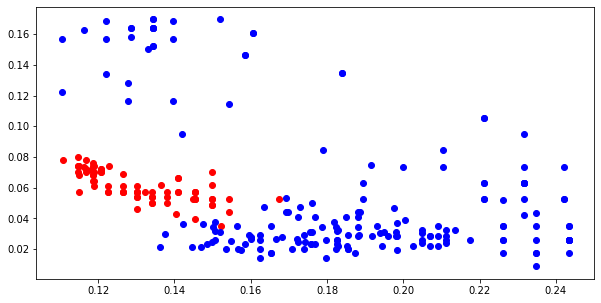

In [ ]:
# A diferença pode estar nos genes

fig, ax = plt.subplots(figsize=(10, 5))
for protein in [ 'coi', 'coii', 'coiii']:
  ax.scatter(x=features[features["protein"] == protein]['L'], 
            y=features[features["protein"] == protein]['V'], c="r")
for proteinnp in ['nd1', 'nd2', 'nd3', 'nd4',
       'nd4l', 'nd5', 'nd6']:
    ax.scatter(x=features[features["protein"] == proteinnp]['L'], 
          y=features[features["protein"] == proteinnp]['V'], c="b")

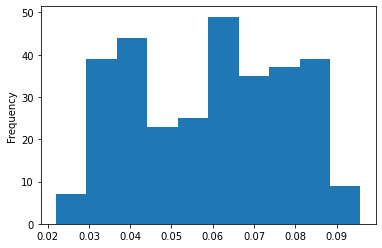

In [ ]:
features["F"].plot(kind="hist")

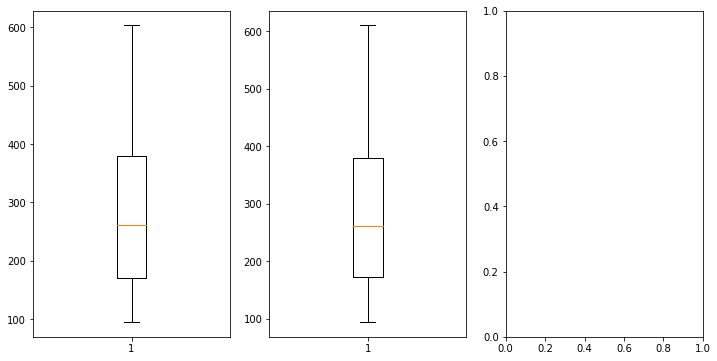

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)

ax1[0].boxplot(features[features["specie"] == "homo"]["protein_len"])
ax1[1].boxplot(features[features["specie"] != "homo"]["protein_len"])

fig1.show()

In [ ]:
features.describe()

,A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,Y,V,W,protein_len,freq_aromatic,freq_eletricchd
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.065324,0.016172,0.039744,0.017439,0.007597,0.021453,0.028593,0.060302,0.024028,0.085900,0.169368,0.021833,0.062121,0.059300,0.049098,0.073276,0.080116,0.036243,0.054627,0.025653,306.413681,0.121196,0.062034
std,0.017000,0.006893,0.013868,0.012388,0.005978,0.010386,0.015602,0.036610,0.016996,0.021491,0.036120,0.009607,0.023640,0.018412,0.016774,0.015166,0.025035,0.012484,0.037191,0.011054,151.841619,0.030010,0.020766
min,0.028571,0.000000,0.005780,0.000000,0.000000,0.000000,0.008850,0.017391,0.000000,0.031915,0.110465,0.000000,0.017391,0.022026,0.010526,0.043478,0.011429,0.008850,0.008696,0.000000,94.000000,0.061947,0.011561
25%,0.053640,0.010526,0.030576,0.009404,0.003135,0.013645,0.017391,0.037681,0.011594,0.070485,0.139535,0.017510,0.046512,0.042105,0.042384,0.061137,0.067816,0.028053,0.028986,0.019900,172.000000,0.096916,0.050236
50%,0.065134,0.017544,0.041394,0.014901,0.007663,0.023965,0.021053,0.043573,0.026403,0.086957,0.165217,0.022026,0.058824,0.061947,0.054475,0.073684,0.079295,0.037618,0.044248,0.028302,261.000000,0.121739,0.068093
75%,0.077973,0.021786,0.050109,0.026087,0.008811,0.028986,0.037037,0.073241,0.032946,0.101385,0.194690,0.026316,0.069641,0.074456,0.060870,0.083126,0.095765,0.042843,0.063158,0.031884,380.000000,0.141975,0.075970
max,0.105263,0.026820,0.075362,0.052863,0.028571,0.044248,0.066079,0.186047,0.065134,0.132743,0.243478,0.043478,0.157895,0.095785,0.078261,0.138298,0.146018,0.073171,0.169591,0.045977,610.000000,0.183908,0.099617


In [ ]:
import seaborn as sns; sns.set()

In [ ]:
sns.pair

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
X=np.asarray(dados)
X=X[:,:20]

In [ ]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

In [ ]:
df_x = pd.DataFrame(Xpca, columns=["pc1", "pc2"])

df_x

,pc1,pc2
0,-0.047686,-0.004185
1,-0.040622,-0.008028
2,-0.043864,-0.014295
3,-0.041340,-0.014567
4,-0.035121,-0.012032
...,...,...
302,0.176332,0.036682
303,0.177307,0.040944
304,0.125483,0.053542
305,0.113163,0.047805


In [ ]:
df_pca = pd.concat([df_x, features['specie']])